## Replacement project

## DataCo Smart Supply Chain — Tailored Project Brief
Project title-
## Optimizing DataCo’s Supply Chain: Data Cleaning, EDA & Tableau Dashboard

## Problem statement

DataCo wants to reduce supply-chain costs and improve delivery performance while protecting profitability. Using the DataCo Smart Supply Chain dataset (orders, products, shipping, customer demographics, vendors), your goal is to clean and enrich the data, perform exploratory analyses to reveal bottlenecks and cost drivers, and build an interactive Tableau dashboard that helps operations and procurement make evidence-based decisions about vendor selection, regional priorities, and shipping strategies.

Business objectives

Identify the vendors, products and regions that drive revenue and profit — and those that cause losses.

Quantify shipping performance (delivery times, delays) and its effect on cost, profit and customer satisfaction.

Detect anomalies (outliers and data quality issues) that mask real insights.

Provide prioritized, actionable recommendations: vendor negotiation targets, shipping cost reduction opportunities, and category-focused profit improvements.

## Importing the necessary libraries

In [41]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns   
%matplotlib inline


## Opening  the file using pandas

In [42]:
import pandas as pd

# Try with latin1 or ISO-8859-1 if utf-8 fails
df_supply = pd.read_csv("DataCoSupplyChainDataset.csv", encoding="latin1")
df_desc   = pd.read_csv("DescriptionDataCoSupplyChain.csv", encoding="latin1")
df_logs   = pd.read_csv("tokenized_access_logs.csv", encoding="latin1")

# Preview
print(df_supply.head())
print(df_desc.head())
print(df_logs.head())

       Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

   Benefit per order  Sales per customer   Delivery Status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   
2        -247.779999          309.720001  Shipping on time   
3          22.860001          304.809998  Advance shipping   
4         134.210007          298.250000  Advance shipping   

   Late_delivery_risk  Category Id   Category Name Customer City  ...  \
0                   0           73  Sporting Goods        Caguas  ...   
1                   1           73  Sporting Goo

## Analysing the Data

In [43]:
## looking at what data is there checking for null values and data types
df_supply.head()


,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [44]:
df_logs.head()

,Product,Category,Date,Month,Hour,Department,ip,url
0,adidas Brazuca 2017 Official Match Ball,baseball & softball,9/1/2017 6:00,Sep,6,fitness,37.97.182.65,/department/fitness/category/baseball%20&%20so...
1,The North Face Women's Recon Backpack,hunting & shooting,9/1/2017 6:00,Sep,6,fan shop,206.56.112.1,/department/fan%20shop/category/hunting%20&%20...
2,adidas Kids' RG III Mid Football Cleat,featured shops,9/1/2017 6:00,Sep,6,apparel,215.143.180.0,/department/apparel/category/featured%20shops/...
3,Under Armour Men's Compression EV SL Slide,electronics,9/1/2017 6:00,Sep,6,footwear,206.56.112.1,/department/footwear/category/electronics/prod...
4,Pelican Sunstream 100 Kayak,water sports,9/1/2017 6:01,Sep,6,fan shop,136.108.56.242,/department/fan%20shop/category/water%20sports...


In [45]:
df_desc.head()

,FIELDS,DESCRIPTION
0,Type,: Type of transaction made
1,Days for shipping (real),: Actual shipping days of the purchased product
2,Days for shipment (scheduled),: Days of scheduled delivery of the purchased...
3,Benefit per order,: Earnings per order placed
4,Sales per customer,: Total sales per customer made per customer


In [46]:
df_desc.info()
df_logs.info()
df_supply.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   FIELDS       52 non-null     object
 1   DESCRIPTION  52 non-null     object
dtypes: object(2)
memory usage: 960.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469977 entries, 0 to 469976
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Product     469977 non-null  object
 1   Category    469977 non-null  object
 2   Date        469977 non-null  object
 3   Month       469977 non-null  object
 4   Hour        469977 non-null  int64 
 5   Department  469977 non-null  object
 6   ip          469977 non-null  object
 7   url         469977 non-null  object
dtypes: int64(1), object(7)
memory usage: 28.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Co

In [47]:
df_supply.isnull().sum()



Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [48]:
df_desc.isnull().sum()

FIELDS         0
DESCRIPTION    0
dtype: int64

In [49]:
df_logs.isnull().sum()


Product       0
Category      0
Date          0
Month         0
Hour          0
Department    0
ip            0
url           0
dtype: int64

## Droping null values

In [50]:
df_supply = df_supply.dropna(subset=['Customer Zipcode', 'Customer Lname'])
df_supply = df_supply[(df_supply['Customer Zipcode'] != "Unknown") & 
                      (df_supply['Customer Lname'] != "Unknown")]




In [51]:
df_supply.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180508 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180508 non-null  object 
 1   Days for shipping (real)       180508 non-null  int64  
 2   Days for shipment (scheduled)  180508 non-null  int64  
 3   Benefit per order              180508 non-null  float64
 4   Sales per customer             180508 non-null  float64
 5   Delivery Status                180508 non-null  object 
 6   Late_delivery_risk             180508 non-null  int64  
 7   Category Id                    180508 non-null  int64  
 8   Category Name                  180508 non-null  object 
 9   Customer City                  180508 non-null  object 
 10  Customer Country               180508 non-null  object 
 11  Customer Email                 180508 non-null  object 
 12  Customer Fname                 1805

## Checking for duplicates

In [52]:
df_supply.duplicated().sum()

np.int64(0)

In [53]:
df_desc.duplicated().sum()

np.int64(0)

In [54]:
df_logs.duplicated().sum()

np.int64(3249)

In [55]:
df_logs = df_logs.drop_duplicates(keep='last')


In [56]:
df_logs.duplicated().sum()

np.int64(0)

## Looking for the data types in the data

In [57]:
df_logs.dtypes

Product       object
Category      object
Date          object
Month         object
Hour           int64
Department    object
ip            object
url           object
dtype: object

In [58]:
df_desc.dtypes

FIELDS         object
DESCRIPTION    object
dtype: object

In [59]:
df_supply.dtypes

Type                              object
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Benefit per order                float64
Sales per customer               float64
Delivery Status                   object
Late_delivery_risk                 int64
Category Id                        int64
Category Name                     object
Customer City                     object
Customer Country                  object
Customer Email                    object
Customer Fname                    object
Customer Id                        int64
Customer Lname                    object
Customer Password                 object
Customer Segment                  object
Customer State                    object
Customer Street                   object
Customer Zipcode                 float64
Department Id                      int64
Department Name                   object
Latitude                         float64
Longitude                        float64
Market          

In [60]:
df_desc.describe()

,FIELDS,DESCRIPTION
count,52,52
unique,52,51
top,Type,: Product category code
freq,1,2


In [61]:
df_logs.describe()

,Hour
count,466728.000000
mean,14.564078
std,5.572751
min,0.000000
25%,10.000000
50%,15.000000
75%,20.000000
max,23.000000


In [62]:
df_supply.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,180508.000000,180508.000000,180508.000000,180508.000000,180508.000000,180508.000000,180508.000000,180508.000000,180508.000000,180508.000000,...,180508.000000,180508.000000,180508.000000,180508.000000,24840.000000,180508.000000,180508.000000,0.0,180508.000000,180508.0
mean,3.497673,2.931837,21.971563,183.101751,0.548297,31.849270,6690.778857,35920.246698,5.443454,29.719858,...,2.127706,203.765496,183.101751,21.971563,55426.132327,692.469414,31.849270,NaN,141.222139,0.0
std,1.623743,1.374457,104.433860,120.041578,0.497663,15.637996,4162.304984,37542.214613,1.629175,9.813737,...,1.453469,132.270788,120.041578,104.433860,31919.279101,336.417349,15.637996,NaN,139.726960,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,...,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.000000,725.000000,4.000000,18.265432,...,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6456.000000,19380.000000,5.000000,33.144863,...,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78202.500000,7.000000,39.279617,...,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,...,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0


In [63]:
df_supply.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


## Checking what data types are in the files and if they are in correct form

In [66]:
df_supply.dtypes


Type                              object
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Benefit per order                float64
Sales per customer               float64
Delivery Status                   object
Late_delivery_risk                 int64
Category Id                        int64
Category Name                     object
Customer City                     object
Customer Country                  object
Customer Email                    object
Customer Fname                    object
Customer Id                        int64
Customer Lname                    object
Customer Password                 object
Customer Segment                  object
Customer State                    object
Customer Street                   object
Customer Zipcode                 float64
Department Id                      int64
Department Name                   object
Latitude                         float64
Longitude                        float64
Market          

In [67]:
df_desc.dtypes


FIELDS         object
DESCRIPTION    object
dtype: object

In [68]:
df_logs.dtypes

Product       object
Category      object
Date          object
Month         object
Hour           int64
Department    object
ip            object
url           object
dtype: object

In [69]:
## changing data types to correct ones
# Convert Date column to datetime
df_logs['Date'] = pd.to_datetime(df_logs['Date'], errors='coerce')

# If Month is numeric (1–12)
df_logs['Month'] = pd.to_numeric(df_logs['Month'], errors='coerce')

# If Month is text (e.g., "Jan"), leave as object or convert to categorical
df_logs['Month'] = df_logs['Month'].astype('category')


In [70]:
df_logs.dtypes

Product               object
Category              object
Date          datetime64[ns]
Month               category
Hour                   int64
Department            object
ip                    object
url                   object
dtype: object

## *Explotory Data Analysis*

In [73]:
##Check for data in columns
df_desc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   FIELDS       52 non-null     object
 1   DESCRIPTION  52 non-null     object
dtypes: object(2)
memory usage: 960.0+ bytes


In [74]:
df_logs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 466728 entries, 0 to 469976
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Product     466728 non-null  object        
 1   Category    466728 non-null  object        
 2   Date        466728 non-null  datetime64[ns]
 3   Month       0 non-null       category      
 4   Hour        466728 non-null  int64         
 5   Department  466728 non-null  object        
 6   ip          466728 non-null  object        
 7   url         466728 non-null  object        
dtypes: category(1), datetime64[ns](1), int64(1), object(5)
memory usage: 28.9+ MB


In [75]:
df_supply.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180508 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180508 non-null  object 
 1   Days for shipping (real)       180508 non-null  int64  
 2   Days for shipment (scheduled)  180508 non-null  int64  
 3   Benefit per order              180508 non-null  float64
 4   Sales per customer             180508 non-null  float64
 5   Delivery Status                180508 non-null  object 
 6   Late_delivery_risk             180508 non-null  int64  
 7   Category Id                    180508 non-null  int64  
 8   Category Name                  180508 non-null  object 
 9   Customer City                  180508 non-null  object 
 10  Customer Country               180508 non-null  object 
 11  Customer Email                 180508 non-null  object 
 12  Customer Fname                 1805

In [79]:
## quality checks
# Basic shape and memory
print("Rows, cols:", df_supply.shape)
print("\nInfo:")
display(df_supply.info())

# Missing values
missing = df_supply.isnull().sum().sort_values(ascending=False)
print("\nTop missing columns:\n", missing.head(20))

# Basic numeric summary
display(df_supply.describe(include='all').T)



Rows, cols: (180508, 53)

Info:
<class 'pandas.core.frame.DataFrame'>
Index: 180508 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180508 non-null  object 
 1   Days for shipping (real)       180508 non-null  int64  
 2   Days for shipment (scheduled)  180508 non-null  int64  
 3   Benefit per order              180508 non-null  float64
 4   Sales per customer             180508 non-null  float64
 5   Delivery Status                180508 non-null  object 
 6   Late_delivery_risk             180508 non-null  int64  
 7   Category Id                    180508 non-null  int64  
 8   Category Name                  180508 non-null  object 
 9   Customer City                  180508 non-null  object 
 10  Customer Country               180508 non-null  object 
 11  Customer Email                 180508 non-null  object 
 12  Cus

None


Top missing columns:
 Product Description              180508
Order Zipcode                    155668
Days for shipment (scheduled)         0
Days for shipping (real)              0
Type                                  0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        0
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Benefit per order                     0
dtype: int64


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Type,180508,4,DEBIT,69290,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Days for shipping (real),180508.0,NaN,NaN,NaN,3.497673,1.623743,0.0,2.0,3.0,5.0,6.0
Days for shipment (scheduled),180508.0,NaN,NaN,NaN,2.931837,1.374457,0.0,2.0,4.0,4.0,4.0
Benefit per order,180508.0,NaN,NaN,NaN,21.971563,104.43386,-4274.97998,7.0,31.52,64.800003,911.799988
Sales per customer,180508.0,NaN,NaN,NaN,183.101751,120.041578,7.49,104.379997,163.990005,247.399994,1939.98999
Delivery Status,180508,4,Late delivery,98972,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Late_delivery_risk,180508.0,NaN,NaN,NaN,0.548297,0.497663,0.0,0.0,1.0,1.0,1.0
Category Id,180508.0,NaN,NaN,NaN,31.84927,15.637996,2.0,18.0,29.0,45.0,76.0
Category Name,180508,50,Cleats,24551,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer City,180508,562,Caguas,66768,NaN,NaN,NaN,NaN,NaN,NaN,NaN


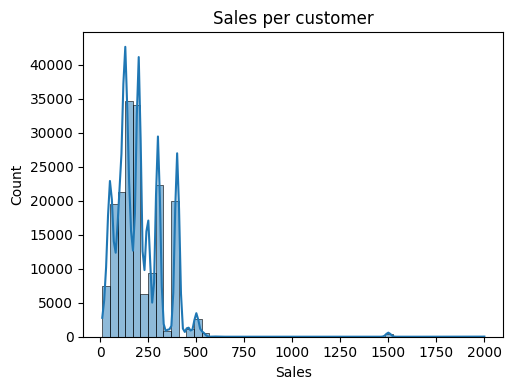

In [82]:
# Safely coerce numeric columns
# Define the correct column names
sales_col = "Sales"
profit_col = "Profit"

plt.figure(figsize=(14,4))
if sales_col in df_supply.columns:
    plt.subplot(1,3,1)
    sns.histplot(df_supply[sales_col].dropna(), bins=50, kde=True)
    plt.title("Sales per customer")

if profit_col in df_supply.columns:
    plt.subplot(1,3,2)
    sns.histplot(df_supply[profit_col].dropna(), bins=50, kde=True)
    plt.title("Profit (Benefit per order)")

if "shipping_days" in df_supply.columns:
    plt.subplot(1,3,3)
    sns.histplot(df_supply["shipping_days"].dropna(), bins=40, kde=True)
    plt.title("Shipping days")

plt.tight_layout()
plt.show()

## Top contributors

In [101]:
# Top customers combine
# Define column names
cust_fname = "Customer Fname"
cust_lname = "Customer Lname"
sales_col = "Sales"
category_col = "Category Name"
product_col = "Product Name"

# Combine customer name
cust_name = None
if cust_fname in df_supply.columns and cust_lname in df_supply.columns:
    df_supply['customer_fullname'] = df_supply[cust_fname].astype(str).str.strip() + " " + df_supply[cust_lname].astype(str).str.strip()
    cust_name = 'customer_fullname'
elif cust_fname in df_supply.columns:
    cust_name = cust_fname

# Top customers by revenue
if cust_name and sales_col in df_supply.columns:
    top_customers = df_supply.groupby(cust_name)[sales_col].sum().sort_values(ascending=False).head(20)
    print("Top customers by revenue:")
    display(top_customers.head(10))

# Top categories by revenue
if category_col in df_supply.columns and sales_col in df_supply.columns:
    top_cats = df_supply.groupby(category_col)[sales_col].sum().sort_values(ascending=False).head(20)
    print("Top categories by revenue:")
    display(top_cats)

# Top products by revenue
if product_col in df_supply.columns and sales_col in df_supply.columns:
    top_products = df_supply.groupby(product_col)[sales_col].sum().sort_values(ascending=False).head(20)
    print("Top products by revenue:")
    display(top_products)

Top customers by revenue:


customer_fullname
Mary Smith           4.771646e+06
Robert Smith         1.522310e+05
James Smith          1.479244e+05
David Smith          1.457768e+05
John Smith           1.298826e+05
William Smith        1.085233e+05
Michael Smith        9.284303e+04
Elizabeth Smith      9.051602e+04
Mary Jones           8.886048e+04
Christopher Smith    8.527105e+04
Name: Sales, dtype: float64

Top categories by revenue:


Category Name
Fishing                 6.929654e+06
Cleats                  4.431943e+06
Camping & Hiking        4.118426e+06
Cardio Equipment        3.694843e+06
Women's Apparel         3.147800e+06
Water Sports            3.113845e+06
Men's Footwear          2.891758e+06
Indoor/Outdoor Games    2.888994e+06
Shop By Sport           1.309522e+06
Computers               6.630000e+05
Electronics             3.710346e+05
Cameras                 2.676077e+05
Garden                  2.577687e+05
Children's Clothing     2.317579e+05
Crafts                  2.219719e+05
Girls' Apparel          1.517062e+05
Women's Clothing        1.398514e+05
Accessories             1.336715e+05
Sporting Goods          1.170068e+05
Golf Gloves             1.166954e+05
Name: Sales, dtype: float64

Top products by revenue:


Product Name
Field & Stream Sportsman 16 Gun Fire Safe        6.929654e+06
Perfect Fitness Perfect Rip Deck                 4.421143e+06
Diamondback Women's Serene Classic Comfort Bi    4.118426e+06
Nike Men's Free 5.0+ Running Shoe                3.667633e+06
Nike Men's Dri-FIT Victory Golf Polo             3.147800e+06
Pelican Sunstream 100 Kayak                      3.099845e+06
Nike Men's CJ Elite 2 TD Football Cleat          2.891758e+06
O'Brien Men's Neoprene Life Vest                 2.888994e+06
Under Armour Girls' Toddler Spine Surge Runni    1.269083e+06
Dell Laptop                                      6.630000e+05
Web Camera                                       2.676077e+05
Lawn mower                                       2.577687e+05
Children's heaters                               2.317579e+05
Porcelain crafts                                 2.219719e+05
Summer dresses                                   1.398514e+05
Smart watch                                      1.170068

In [86]:
# Time series analysis for your DataCo dataframe
# 3. Create shipping_days
import pandas as pd

# 1. Show column names
print(df_supply.columns)

# 2. Convert likely date columns
for col in ["order date (DateOrders)", "shipping date (DateOrders)"]:
    if col in df_supply.columns:
        df_supply[col] = pd.to_datetime(df_supply[col], errors="coerce")
        print(f"Converted {col} to datetime")

# 3. Create shipping_days
if "order date (DateOrders)" in df_supply.columns and "shipping date (DateOrders)" in df_supply.columns:
    df_supply["shipping_days"] = (
        df_supply["shipping date (DateOrders)"] - df_supply["order date (DateOrders)"]
    ).dt.days
    print("Created shipping_days column")
elif "Days for shipping (real)" in df_supply.columns:
    df_supply["shipping_days"] = df_supply["Days for shipping (real)"]
    print("Used existing Days for shipping (real) column")

# 4. Preview
print(df_supply[["shipping_days"]].head())


Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [89]:
print(df_supply.columns)

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

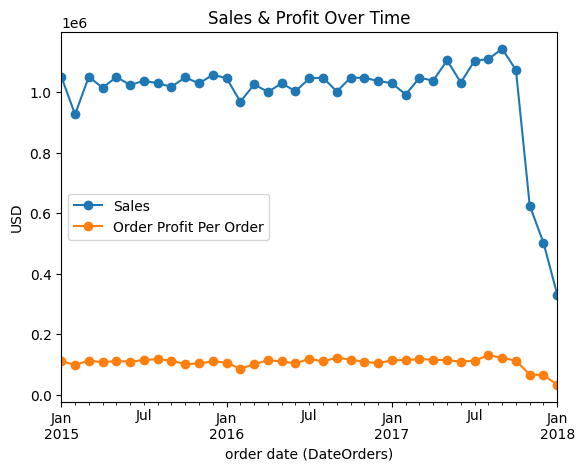

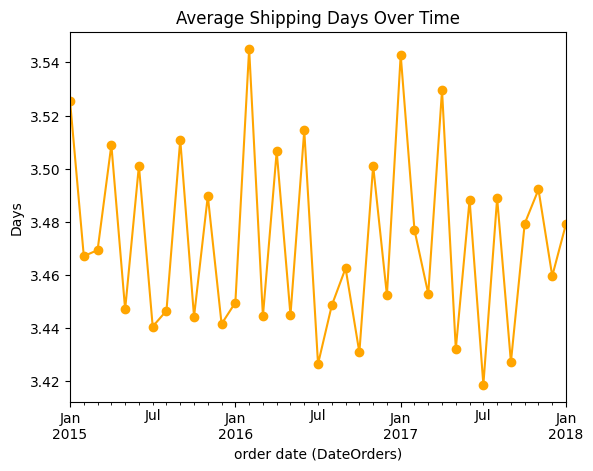

In [91]:
import matplotlib.pyplot as plt

# 1. Make sure order date is datetime
df_supply['order date (DateOrders)'] = pd.to_datetime(df_supply['order date (DateOrders)'], errors='coerce')

# 2. Group by month
monthly = df_supply.groupby(df_supply['order date (DateOrders)'].dt.to_period("M")).agg({
    "Sales": "sum",
    "Order Profit Per Order": "sum",
    "shipping_days": "mean"
})

# 3. Plot sales & profit trends
monthly[["Sales", "Order Profit Per Order"]].plot(kind="line", marker="o")
plt.title("Sales & Profit Over Time")
plt.ylabel("USD")
plt.show()

# 4. Plot shipping days trend
monthly["shipping_days"].plot(kind="line", marker="o", color="orange")
plt.title("Average Shipping Days Over Time")
plt.ylabel("Days")
plt.show()


## Relationship and Correlations


Numeric cols: ['Days for shipping (real)', 'Days for shipment (scheduled)', 'Benefit per order', 'Sales per customer', 'Late_delivery_risk', 'Category Id', 'Customer Id', 'Customer Zipcode', 'Department Id', 'Latitude', 'Longitude', 'Order Customer Id', 'Order Id', 'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price', 'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 'Order Item Total', 'Order Profit Per Order', 'Order Zipcode', 'Product Card Id', 'Product Category Id', 'Product Description', 'Product Price', 'Product Status', 'shipping_days']


,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status,shipping_days
Days for shipping (real),1.000000,0.515884,-0.005108,0.001760,0.401418,-0.000316,0.003460,0.000122,-0.001634,-0.004068,...,0.001968,0.001760,-0.005108,-0.000811,-0.000835,-0.000316,NaN,0.002196,NaN,0.995770
Days for shipment (scheduled),0.515884,1.000000,-0.000210,0.006421,-0.369343,-0.000383,0.000877,-0.003026,-0.000227,-0.005318,...,0.006306,0.006421,-0.000210,0.005249,-0.000445,-0.000383,NaN,0.006890,NaN,0.534390
Benefit per order,-0.005108,-0.000210,1.000000,0.133435,-0.003729,0.031826,0.009286,0.002229,0.031455,0.000320,...,0.131769,0.133435,1.000000,-0.004978,0.033102,0.031826,NaN,0.103401,NaN,-0.004454
Sales per customer,0.001760,0.006421,0.133435,1.000000,-0.003781,0.225149,0.060084,-0.001331,0.232448,-0.000232,...,0.989744,1.000000,0.133435,-0.000138,0.236311,0.225149,NaN,0.781762,NaN,0.002529
Late_delivery_risk,0.401418,-0.369343,-0.003729,-0.003781,1.000000,0.001780,0.001512,0.003166,0.001049,0.000700,...,-0.003554,-0.003781,-0.003729,-0.014131,0.001513,0.001780,NaN,-0.002160,NaN,0.377518
Category Id,-0.000316,-0.000383,0.031826,0.225149,0.001780,1.000000,0.274391,0.002846,0.889035,0.002172,...,0.227429,0.225149,0.031826,-0.005943,0.991096,1.000000,NaN,0.461007,NaN,-0.000640
Customer Id,0.003460,0.000877,0.009286,0.060084,0.001512,0.274391,1.000000,0.001959,0.136940,0.002321,...,0.060862,0.060084,0.009286,-0.005659,0.227822,0.274391,NaN,0.110975,NaN,0.003402
Customer Zipcode,0.000122,-0.003026,0.002229,-0.001331,0.003166,0.002846,0.001959,1.000000,0.002876,0.584564,...,-0.001518,-0.001331,0.002229,0.011843,0.003127,0.002846,NaN,0.002155,NaN,-0.000990
Department Id,-0.001634,-0.000227,0.031455,0.232448,0.001049,0.889035,0.136940,0.002876,1.000000,0.002435,...,0.234797,0.232448,0.031455,-0.005982,0.906283,0.889035,NaN,0.446853,NaN,-0.001804
Latitude,-0.004068,-0.005318,0.000320,-0.000232,0.000700,0.002172,0.002321,0.584564,0.002435,1.000000,...,-0.000706,-0.000232,0.000320,-0.002921,0.002011,0.002172,NaN,0.000458,NaN,-0.004807


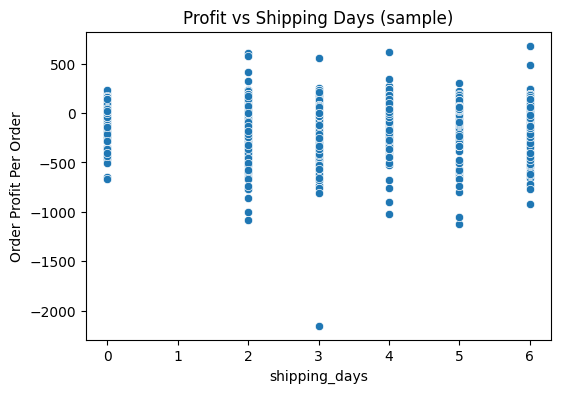

Avg profit when late vs on-time:


Late_delivery_risk
0    22.400573
1    21.618133
Name: Order Profit Per Order, dtype: float64

In [ ]:
# Use the correct profit column name
profit_col = "Order Profit Per Order"

# Correlation matrix for numeric columns
num_cols = df_supply.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric cols:", num_cols)
display(df_supply[num_cols].corr())

# Scatter profit vs shipping_days (are longer shipping times hurting profit?)
if profit_col in df_supply.columns:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x='shipping_days', y=profit_col, data=df_supply.sample(min(10000, len(df_supply)), random_state=1))
    plt.title("Profit vs Shipping Days (sample)")
    plt.show()

# Late deliveries correlation with profit/sales
if late_col and profit_col:
    print("Avg profit when late vs on-time:")
    display(df_supply.groupby(late_col)[profit_col].mean())



## segment and region analysis

Sales                      Order Profit Per Order  \
                        mean           sum  count                   mean   
Customer Segment                                                           
Consumer          204.219406  1.909472e+07  93501              22.173062   
Corporate         203.834536  1.116687e+07  54784              21.941396   
Home Office       202.331012  6.519712e+06  32223              21.438166   

                                       
                           sum  count  
Customer Segment                       
Consumer          2.073203e+06  93501  
Corporate         1.202037e+06  54784  
Home Office       6.908020e+05  32223

Sales                      Order Profit Per Order  \
                        mean           sum  count                   mean   
Customer Segment                                                           
Consumer          204.219406  1.909472e+07  93501              22.173062   
Corporate         203.834536  1.116687e+07  54784              21.941396   
Home Office       202.331012  6.519712e+06  32223              21.438166   

                                       
                           sum  count  
Customer Segment                       
Consumer          2.073203e+06  93501  
Corporate         1.202037e+06  54784  
Home Office       6.908020e+05  32223

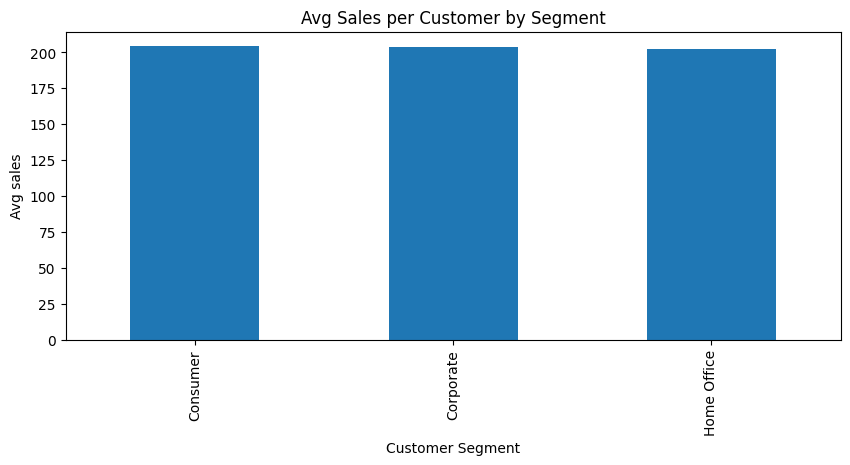

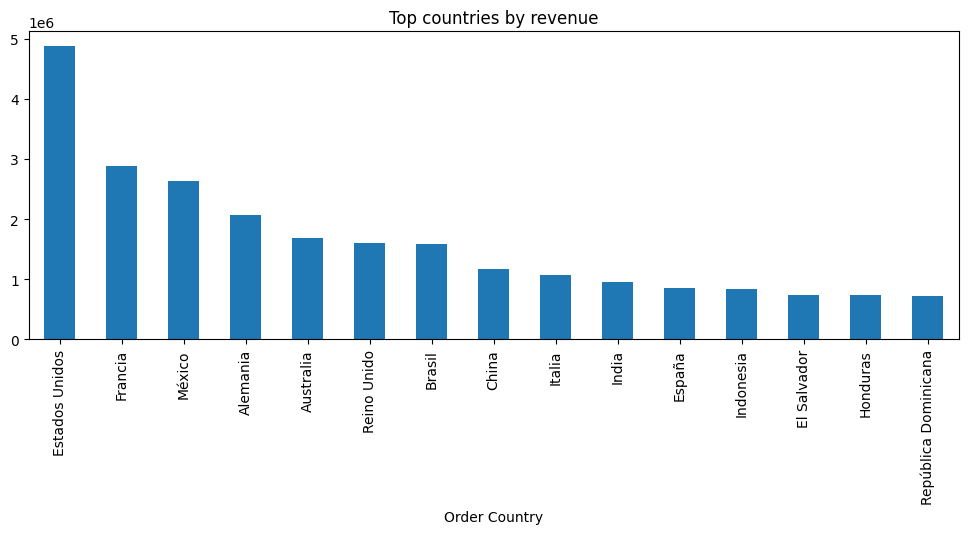

In [100]:
# Segment performance
segment_col = "Customer Segment"
sales_col   = "Sales"
profit_col  = "Order Profit Per Order"
# Define the column first
country_col = "Order Country"       # or "Customer Country"

sales_col   = "Sales"
profit_col  = "Order Profit Per Order"




# Segment performance
if segment_col and sales_col:
    seg = df_supply.groupby(segment_col)[[sales_col, profit_col]].agg(['mean','sum','count'])
    display(seg.sort_values((sales_col,'sum'), ascending=False).head(10))

if segment_col and sales_col:
    seg = df_supply.groupby(segment_col)[[sales_col, profit_col]].agg(['mean','sum','count'])
    display(seg.sort_values((sales_col,'sum'), ascending=False).head(10))

    # bar plot avg sales per segment
    plt.figure(figsize=(10,4))
    seg[(sales_col,'mean')].sort_values(ascending=False).plot(kind='bar')
    plt.title("Avg Sales per Customer by Segment")
    plt.ylabel("Avg sales")
    plt.show()

# Country breakdown (top)
if country_col and sales_col:
    country_top = df_supply.groupby(country_col)[sales_col].sum().sort_values(ascending=False).head(15)
    country_top.plot(kind='bar', figsize=(12,4), title="Top countries by revenue")
    plt.show()


In [102]:
##saving the output to csv file
df_supply.to_csv("cleaned_supply_chain_data.csv", index=False)